## Exercise 1 Exploratory Analysis using Pandas and matplotlib

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
store = pd.read_csv("data/store.csv")
train_df = pd.read_csv("data/train.csv")
store

/home/jaisu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Part A (Stats)

#### Store with maximum sale

In [3]:
train_df.loc[train_df['Sales'].idxmax(), ['Store','Sales','Date']]

Store           909
Sales         41551
Date     2015-06-22
Name: 44393, dtype: object

In [4]:
store.loc[store['CompetitionDistance'].idxmin()]

Store                                     516
StoreType                                   a
Assortment                                  c
CompetitionDistance                      20.0
CompetitionOpenSinceMonth                 NaN
CompetitionOpenSinceYear                  NaN
Promo2                                      1
Promo2SinceWeek                          35.0
Promo2SinceYear                        2010.0
PromoInterval                Mar,Jun,Sept,Dec
Name: 515, dtype: object

#### competition distance

In [5]:
store[store['CompetitionDistance'] == store['CompetitionDistance'].min()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
515,516,a,c,20.0,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec"


In [6]:
store[store['CompetitionDistance'] == store['CompetitionDistance'].max()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
452,453,a,c,75860.0,NaN,NaN,0,NaN,NaN,NaN


#### Difference in sales when offering promo or not

In [29]:
promo_yes = train_df.loc[train_df['Promo'] == 1, ['Sales']]
promo_no = train_df.loc[train_df['Promo'] == 0, ['Sales']]

## Difference
print(promo_yes['Sales'].mean() - promo_no['Sales'].mean())


3585.1012408091174


In [20]:
#select_stores = promo_yes.Store.tolist()

#### Stores open but no sales

In [37]:
train_df[train_df['Open'] == 1].loc[train_df['Sales'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
86825,971,5,2015-05-15,0,0,1,0,0,1
142278,674,4,2015-03-26,0,0,1,0,0,0
196938,699,4,2015-02-05,0,0,1,1,0,0
322053,708,3,2014-10-01,0,0,1,1,0,0
330176,357,1,2014-09-22,0,0,1,0,0,0
340348,227,4,2014-09-11,0,0,1,0,0,0
340860,835,4,2014-09-11,0,0,1,0,0,0
341795,835,3,2014-09-10,0,0,1,0,0,0
346232,548,5,2014-09-05,0,0,1,1,0,1
346734,28,4,2014-09-04,0,0,1,1,0,0


#### Stores closed but non-zero sales : No such stores found

In [39]:
train_df[train_df['Open'] == 0].loc[train_df['Sales'] != 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [47]:
store.groupby(by=['StoreType'])['Store'].sum()

StoreType
a    336838
b      9545
c     90006
d    185781
Name: Store, dtype: int64

### Part B (Plotting)

#### Plot : Means of sales monthly basis

In [58]:
train_df['month'] = pd.DatetimeIndex(train_df['Date']).month
train_df['year'] = pd.DatetimeIndex(train_df['Date']).year

<AxesSubplot:title={'center':'Avg Total Sales Per Store Over Month of year'}, xlabel='month'>

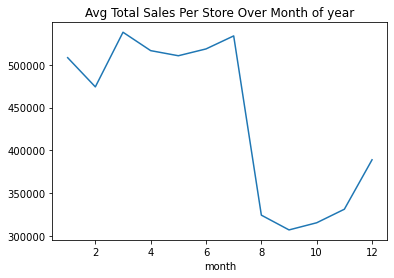

In [71]:
train_df.groupby(by=['month', 'Store'])['Sales'].sum().groupby(by=['month']).mean().plot(title='Avg Total Sales Per Store Over Month of year')

#### Plot : Mean of sales daily basis

<AxesSubplot:title={'center':'Avg Total Sales Per Store Over Day of year'}, xlabel='Date'>

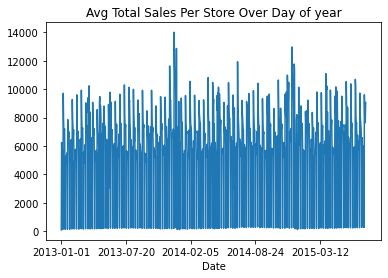

In [77]:
train_df.groupby(by=['Date', 'Store'])['Sales'].sum().groupby(by=['Date']).mean().plot(title='Avg Total Sales Per Store Over Day of year')

#### Cumulative sales for the first store for the first year

<AxesSubplot:title={'center':'Cumulative sales'}>

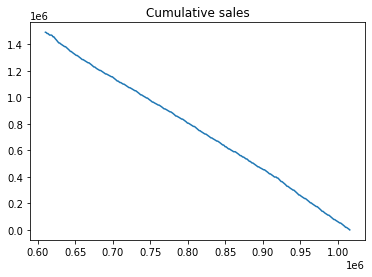

In [82]:
train_df[(train_df['Store'] == 1) & (train_df['year'] == 2013)].sort_values(by='Date')['Sales'].cumsum().plot(title="Cumulative sales")

#### Numbers of customers Vs Total sales

In [83]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015


Text(0.5, 1.0, 'Sales Vs #customers')

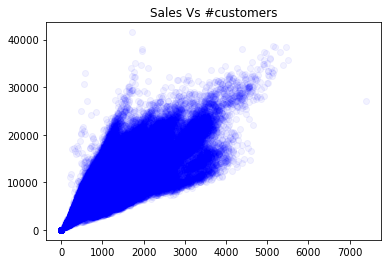

In [90]:
plt.plot(train_df.Customers, train_df.Sales, 'bo', alpha=0.05)
plt.title("Sales Vs #customers")

#### Comp distance Vs Sales

In [95]:
store_sales = train_df[["Store", "Sales"]].groupby(["Store"]).sum().reset_index()

In [97]:
store_sales = store_sales.merge(store[["Store", "CompetitionDistance"]], on=["Store"], how="left")

Text(0.5, 1.0, 'Sales Vs Comp distance')

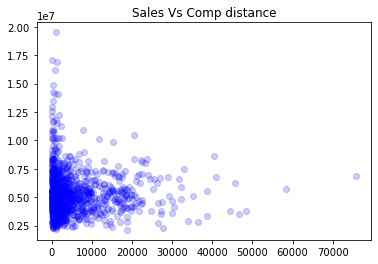

In [102]:
plt.plot(store_sales.CompetitionDistance, store_sales.Sales, 'bo', alpha=0.2)
plt.title("Sales Vs Comp distance")

#### Plotting boxplots of sales for first 10 stores

<AxesSubplot:xlabel='Store', ylabel='Sales'>

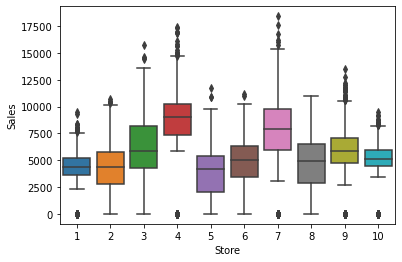

In [116]:
stores = store.Store[:10].tolist()
plotdf_box = train_df[train_df.Store.isin(stores)]
sns.boxplot(x=plotdf_box.Store, y=plotdf_box.Sales, data=plotdf_box)

**Store no. 4 has the highest median sales**

## Exercise 2: Part B

In [127]:
print(train_df.shape)
select_stores = train_df.Store.value_counts().index[train_df.Store.value_counts()==942]

model_df = train_df[train_df.Store.isin(select_stores)]
print(model_df.shape)

(1017209, 11)
(879828, 11)


In [130]:
model_df = model_df[["Store", "Date", "Sales"]]

In [133]:
df_wide = pd.pivot(model_df, index='Store', columns='Date', values='Sales')
df_wide.shape

(934, 942)

In [135]:
df_wide.columns

Index(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
       '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
       ...
       '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26',
       '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31'],
      dtype='object', name='Date', length=942)

In [147]:
start_date = pd.to_datetime("2013-01-01")
num_days = 942

dates = [(start_date + pd.Timedelta(days=x)).strftime('%Y-%m-%d') for x in range(num_days)]
dates

['2013-01-01',
 '2013-01-02',
 '2013-01-03',
 '2013-01-04',
 '2013-01-05',
 '2013-01-06',
 '2013-01-07',
 '2013-01-08',
 '2013-01-09',
 '2013-01-10',
 '2013-01-11',
 '2013-01-12',
 '2013-01-13',
 '2013-01-14',
 '2013-01-15',
 '2013-01-16',
 '2013-01-17',
 '2013-01-18',
 '2013-01-19',
 '2013-01-20',
 '2013-01-21',
 '2013-01-22',
 '2013-01-23',
 '2013-01-24',
 '2013-01-25',
 '2013-01-26',
 '2013-01-27',
 '2013-01-28',
 '2013-01-29',
 '2013-01-30',
 '2013-01-31',
 '2013-02-01',
 '2013-02-02',
 '2013-02-03',
 '2013-02-04',
 '2013-02-05',
 '2013-02-06',
 '2013-02-07',
 '2013-02-08',
 '2013-02-09',
 '2013-02-10',
 '2013-02-11',
 '2013-02-12',
 '2013-02-13',
 '2013-02-14',
 '2013-02-15',
 '2013-02-16',
 '2013-02-17',
 '2013-02-18',
 '2013-02-19',
 '2013-02-20',
 '2013-02-21',
 '2013-02-22',
 '2013-02-23',
 '2013-02-24',
 '2013-02-25',
 '2013-02-26',
 '2013-02-27',
 '2013-02-28',
 '2013-03-01',
 '2013-03-02',
 '2013-03-03',
 '2013-03-04',
 '2013-03-05',
 '2013-03-06',
 '2013-03-07',
 '2013-03-

In [174]:
x = df_wide[dates[:900]]
x.shape


y = df_wide[dates[900:]]
y.shape

(934, 42)

In [176]:
train_list = list(np.arange(0, 800, 1))
test_list = list(np.arange(800, 934, 1))

x_train = x.iloc[train_list]
x_test = x.iloc[test_list]

y_train = y.iloc[train_list]
y_test = y.iloc[test_list]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 900) (134, 900) (800, 42) (134, 42)


In [177]:
y_train.columns

Index(['2015-06-20', '2015-06-21', '2015-06-22', '2015-06-23', '2015-06-24',
       '2015-06-25', '2015-06-26', '2015-06-27', '2015-06-28', '2015-06-29',
       '2015-06-30', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14',
       '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18', '2015-07-19',
       '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
       '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29',
       '2015-07-30', '2015-07-31'],
      dtype='object', name='Date')

### Fit a model for first day in advance